In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata
from sdv.metadata import Metadata
from sdv.single_table import TVAESynthesizer

In [3]:
df = pd.read_csv('Blood_samples_dataset_[IMP].csv')

In [4]:
df

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346,0.012956,0.336925,0.451218,0.175006,0.734664,0.382770,0.656463,0.177502,0.808162,0.684499,...,0.670665,0.311568,0.595083,0.155866,0.885812,0.636125,0.132226,0.716519,0.006121,Diabetes
2347,0.407101,0.124738,0.983306,0.663867,0.361113,0.663716,0.232516,0.341056,0.847441,0.309766,...,0.491185,0.701914,0.218104,0.790341,0.570902,0.339125,0.310964,0.310900,0.622403,Thalasse
2348,0.344356,0.783918,0.582171,0.996841,0.065363,0.242885,0.658851,0.543017,0.290106,0.838722,...,0.141738,0.155871,0.473638,0.250535,0.387197,0.344728,0.606719,0.395145,0.134021,Anemia
2349,0.351722,0.014278,0.898615,0.167550,0.727148,0.046091,0.900434,0.136227,0.134361,0.279219,...,0.570553,0.171245,0.858352,0.362012,0.290984,0.996873,0.882164,0.411158,0.146255,Diabetes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2351 non-null   float64
 1   Cholesterol                                2351 non-null   float64
 2   Hemoglobin                                 2351 non-null   float64
 3   Platelets                                  2351 non-null   float64
 4   White Blood Cells                          2351 non-null   float64
 5   Red Blood Cells                            2351 non-null   float64
 6   Hematocrit                                 2351 non-null   float64
 7   Mean Corpuscular Volume                    2351 non-null   float64
 8   Mean Corpuscular Hemoglobin                2351 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2351 non-null   float64
 10  Insulin                 

In [6]:
#labelencoder = LabelEncoder()
def disease_func(s):
    if s == 'Healthy':
        return 0
    else:
        return 1

In [7]:
#df['Disease'] = labelencoder.fit_transform(df['Disease'])
df['Disease'] = df['Disease'].apply(lambda x: disease_func(x))

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2351 non-null   float64
 1   Cholesterol                                2351 non-null   float64
 2   Hemoglobin                                 2351 non-null   float64
 3   Platelets                                  2351 non-null   float64
 4   White Blood Cells                          2351 non-null   float64
 5   Red Blood Cells                            2351 non-null   float64
 6   Hematocrit                                 2351 non-null   float64
 7   Mean Corpuscular Volume                    2351 non-null   float64
 8   Mean Corpuscular Hemoglobin                2351 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2351 non-null   float64
 10  Insulin                 

In [9]:
df

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,0
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,1
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,1
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,1
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346,0.012956,0.336925,0.451218,0.175006,0.734664,0.382770,0.656463,0.177502,0.808162,0.684499,...,0.670665,0.311568,0.595083,0.155866,0.885812,0.636125,0.132226,0.716519,0.006121,1
2347,0.407101,0.124738,0.983306,0.663867,0.361113,0.663716,0.232516,0.341056,0.847441,0.309766,...,0.491185,0.701914,0.218104,0.790341,0.570902,0.339125,0.310964,0.310900,0.622403,1
2348,0.344356,0.783918,0.582171,0.996841,0.065363,0.242885,0.658851,0.543017,0.290106,0.838722,...,0.141738,0.155871,0.473638,0.250535,0.387197,0.344728,0.606719,0.395145,0.134021,1
2349,0.351722,0.014278,0.898615,0.167550,0.727148,0.046091,0.900434,0.136227,0.134361,0.279219,...,0.570553,0.171245,0.858352,0.362012,0.290984,0.996873,0.882164,0.411158,0.146255,1


In [10]:
corr_matrix = df.corr()

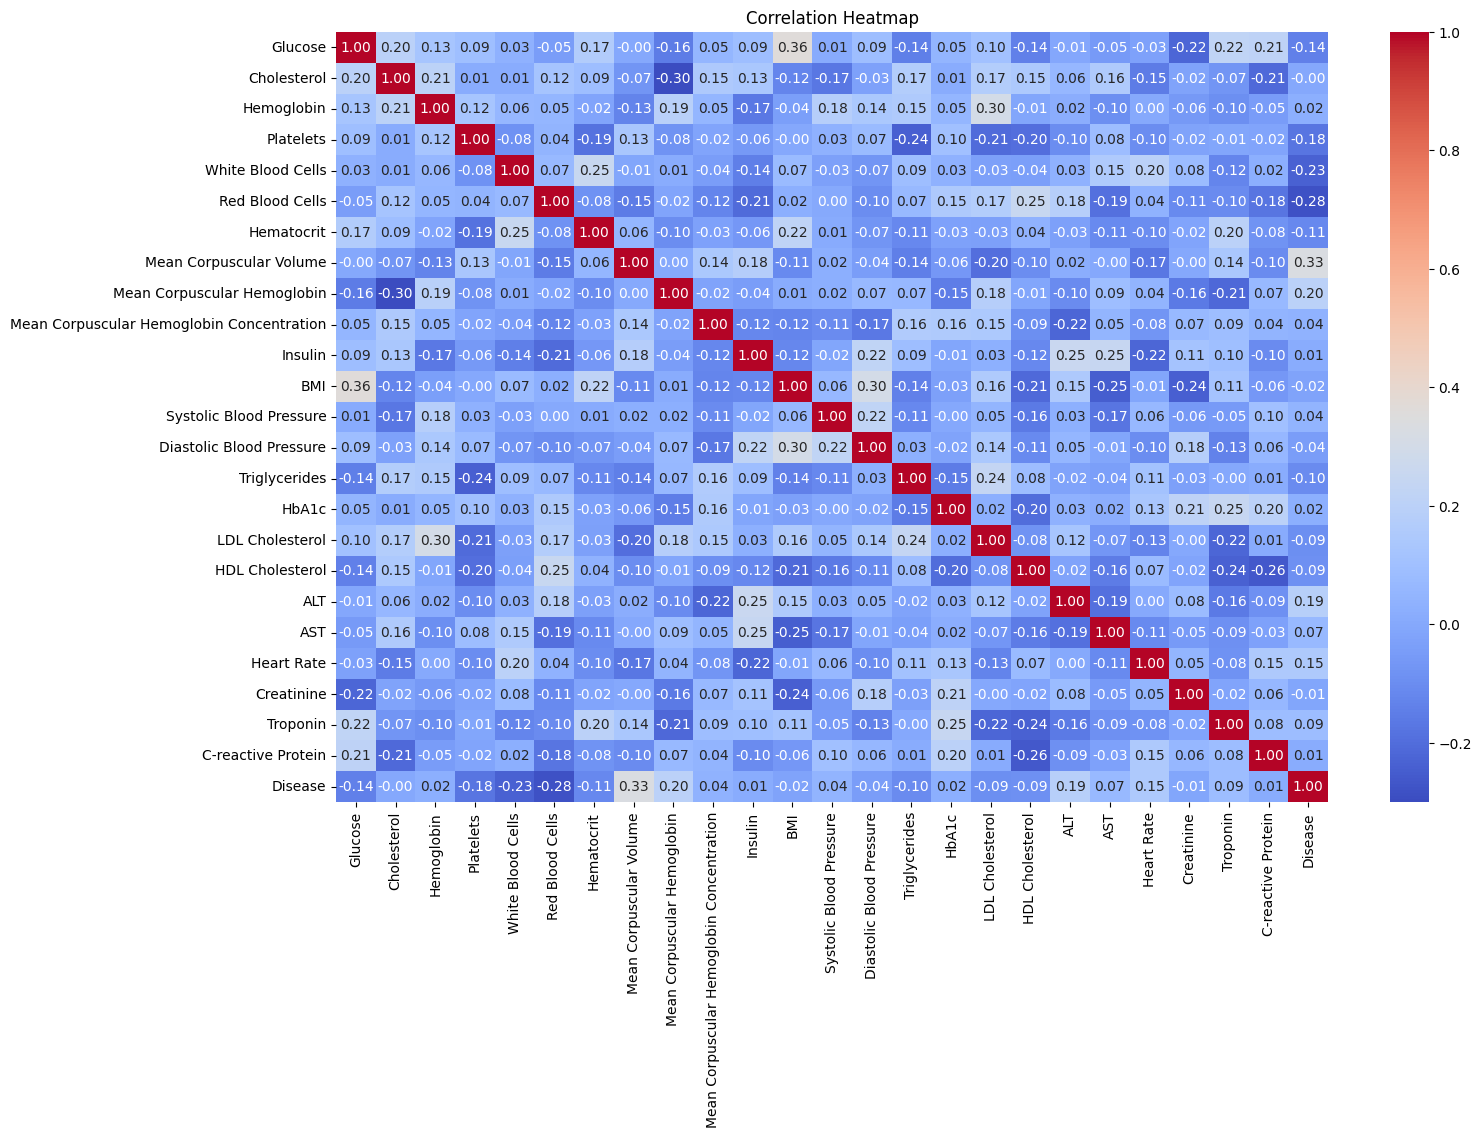

In [11]:
plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [12]:
df.columns

Index(['Glucose', 'Cholesterol', 'Hemoglobin', 'Platelets',
       'White Blood Cells', 'Red Blood Cells', 'Hematocrit',
       'Mean Corpuscular Volume', 'Mean Corpuscular Hemoglobin',
       'Mean Corpuscular Hemoglobin Concentration', 'Insulin', 'BMI',
       'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Triglycerides',
       'HbA1c', 'LDL Cholesterol', 'HDL Cholesterol', 'ALT', 'AST',
       'Heart Rate', 'Creatinine', 'Troponin', 'C-reactive Protein',
       'Disease'],
      dtype='object')

In [13]:
imp_cols = ['Hemoglobin','White Blood Cells','Red Blood Cells','LDL Cholesterol','HDL Cholesterol','Cholesterol','Systolic Blood Pressure','Diastolic Blood Pressure','Creatinine','HbA1c']

In [14]:
ranges = {
    "Glucose": (70, 140),
    "Cholesterol": (125, 200),
    "Hemoglobin": (13.5, 17.5),
    "Platelets": (150000, 450000),
    "White Blood Cells": (4000, 11000),
    "Red Blood Cells": (4.2, 5.4),
    "Hematocrit": (38, 52),
    "Mean Corpuscular Volume": (80, 100),
    "Mean Corpuscular Hemoglobin": (27, 33),
    "Mean Corpuscular Hemoglobin Concentration": (32, 36),
    "Insulin": (5, 25),
    "BMI": (18.5, 24.9),
    "Systolic Blood Pressure": (90, 120),
    "Diastolic Blood Pressure": (60, 80),
    "Triglycerides": (50, 150),
    "HbA1c": (4, 6),
    "LDL Cholesterol": (70, 130),
    "HDL Cholesterol": (40, 60),
    "ALT": (10, 40),
    "AST": (10, 40),
    "Heart Rate": (60, 100),
    "Creatinine": (0.6, 1.2),
    "Troponin": (0, 0.04),
    "C-reactive Protein": (0, 3),
}

In [15]:
def de_standardize(value, min_val, max_val):
    val = (value * (max_val - min_val)) + min_val
    return round(val, 2)

In [16]:
for col, (min_val, max_val) in ranges.items():
    if col in df.columns:
        df[col] = df[col].apply(lambda x: de_standardize(x, min_val, max_val))

In [17]:
df

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,121.77,173.76,16.35,410547.37,8812.03,4.84,42.06,92.62,27.01,35.18,...,5.01,82.93,50.26,11.93,28.32,97.58,0.66,0.02,2.31,0
1,78.53,126.73,17.28,421611.64,7553.98,4.68,40.30,86.15,28.25,34.02,...,5.71,109.15,42.14,38.28,20.33,86.65,1.00,0.03,1.20,1
2,101.68,133.71,15.68,270192.08,6061.77,4.66,46.75,85.90,32.21,32.11,...,4.93,93.24,48.44,10.22,25.21,77.27,0.85,0.03,2.34,1
3,79.56,126.17,15.18,207446.06,4568.18,4.40,39.03,93.37,27.75,34.00,...,4.03,72.41,56.53,17.96,27.82,69.03,0.89,0.03,1.06,1
4,82.37,181.42,17.39,385585.68,7107.16,4.73,50.53,88.84,28.54,35.22,...,4.86,78.78,44.43,10.46,27.01,93.66,0.69,0.03,0.28,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346,70.91,150.27,15.30,202501.73,9142.65,4.66,47.19,83.55,31.85,34.74,...,5.34,88.69,51.90,14.68,36.57,85.45,0.68,0.03,0.02,1
2347,98.50,134.36,17.43,349159.96,6527.79,5.00,41.26,86.82,32.08,33.24,...,4.98,112.11,44.36,33.71,27.13,73.56,0.79,0.01,1.87,1
2348,94.10,183.79,15.83,449052.29,4457.54,4.49,47.22,90.86,28.74,35.35,...,4.28,79.35,49.47,17.52,21.62,73.79,0.96,0.02,0.40,1
2349,94.62,126.07,17.09,200264.93,9090.04,4.26,50.61,82.72,27.81,33.12,...,5.14,80.27,57.17,20.86,18.73,99.87,1.13,0.02,0.44,1


In [18]:
blood_immune_cols = [
    'Hemoglobin', 'Platelets', 'White Blood Cells', 'Red Blood Cells',
    'Hematocrit', 'Mean Corpuscular Volume', 'Mean Corpuscular Hemoglobin',
    'Mean Corpuscular Hemoglobin Concentration', 'C-reactive Protein', 'Disease'
]

In [19]:
df['Disease'].value_counts()

Disease
1    1795
0     556
Name: count, dtype: int64

In [20]:
df_blood = df[blood_immune_cols]

In [21]:
df_blood

,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,C-reactive Protein,Disease
0,16.35,410547.37,8812.03,4.84,42.06,92.62,27.01,35.18,2.31,0
1,17.28,421611.64,7553.98,4.68,40.30,86.15,28.25,34.02,1.20,1
2,15.68,270192.08,6061.77,4.66,46.75,85.90,32.21,32.11,2.34,1
3,15.18,207446.06,4568.18,4.40,39.03,93.37,27.75,34.00,1.06,1
4,17.39,385585.68,7107.16,4.73,50.53,88.84,28.54,35.22,0.28,1
...,...,...,...,...,...,...,...,...,...,...
2346,15.30,202501.73,9142.65,4.66,47.19,83.55,31.85,34.74,0.02,1
2347,17.43,349159.96,6527.79,5.00,41.26,86.82,32.08,33.24,1.87,1
2348,15.83,449052.29,4457.54,4.49,47.22,90.86,28.74,35.35,0.40,1
2349,17.09,200264.93,9090.04,4.26,50.61,82.72,27.81,33.12,0.44,1


In [22]:
# df_blood.to_csv('Blood_immunt_test.csv',index=False)

In [23]:
df_blood.shape

(2351, 10)

In [24]:
df_blood.head()

,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,C-reactive Protein,Disease
0,16.35,410547.37,8812.03,4.84,42.06,92.62,27.01,35.18,2.31,0
1,17.28,421611.64,7553.98,4.68,40.30,86.15,28.25,34.02,1.20,1
2,15.68,270192.08,6061.77,4.66,46.75,85.90,32.21,32.11,2.34,1
3,15.18,207446.06,4568.18,4.40,39.03,93.37,27.75,34.00,1.06,1
4,17.39,385585.68,7107.16,4.73,50.53,88.84,28.54,35.22,0.28,1


In [25]:
df_blood_syn = pd.read_csv('Blood_immunt_test_syn.csv')

In [26]:
df_blood_syn.head()

,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,C-reactive Protein,Disease
0,16.520026,153778.1361,5593.791479,4.710141,43.424450,89.228353,28.833528,34.964479,1.596299,1
1,16.491437,310188.7149,4330.278361,4.355148,46.953229,99.677289,29.336743,33.720881,0.598539,1
2,15.939344,292934.5332,7965.679060,5.243128,42.897016,85.717947,32.514328,34.333882,1.716275,1
3,16.489037,421729.7211,7081.800834,5.195129,38.662531,84.958654,31.344140,32.833571,0.705420,1
4,14.261940,319558.2027,6778.761650,5.187632,45.395599,87.369676,31.211473,35.089886,0.586656,0


In [27]:
df_blood_syn = df_blood_syn.round(2)

In [28]:
df_blood_syn.describe()

,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,C-reactive Protein,Disease
count,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000
mean,15.802386,301601.160357,7610.296984,4.805717,45.137061,90.037899,29.943037,34.247099,1.344219,0.766908
std,1.077584,94675.511044,1948.413169,0.321031,4.027083,5.607195,1.884745,1.068967,0.690169,0.422890
min,13.510000,153778.140000,4070.970000,4.250000,38.160000,80.940000,27.000000,32.030000,0.010000,0.000000
25%,14.830000,207446.060000,5816.270000,4.510000,42.030000,85.750000,28.470000,33.460000,0.750000,1.000000
50%,15.940000,292934.530000,7833.820000,4.750000,44.920000,89.230000,29.520000,34.330000,1.530000,1.000000
75%,16.620000,385585.680000,9214.650000,5.090000,48.620000,95.180000,31.710000,34.960000,1.890000,1.000000
max,17.430000,449817.940000,10935.500000,5.400000,51.690000,99.910000,32.780000,35.900000,2.390000,1.000000


In [29]:
df_blood.describe()

,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,C-reactive Protein,Disease
count,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000
mean,15.844607,301208.095036,7577.603577,4.808269,45.100123,89.843637,29.906240,34.248499,1.290991,0.763505
std,1.085943,91004.000979,1940.889173,0.319647,3.997292,5.515037,1.893686,1.093240,0.728999,0.425020
min,13.510000,153778.140000,4070.970000,4.250000,38.160000,80.940000,27.000000,32.030000,0.010000,0.000000
25%,14.885000,210259.480000,5816.270000,4.520000,42.030000,85.750000,28.250000,33.420000,0.590000,1.000000
50%,15.940000,310188.710000,7691.670000,4.760000,44.910000,89.060000,29.520000,34.410000,1.440000,1.000000
75%,16.660000,376452.320000,9202.150000,5.090000,48.550000,94.450000,31.670000,34.970000,1.890000,1.000000
max,17.430000,449817.940000,10935.500000,5.400000,51.690000,99.910000,32.780000,35.900000,2.390000,1.000000


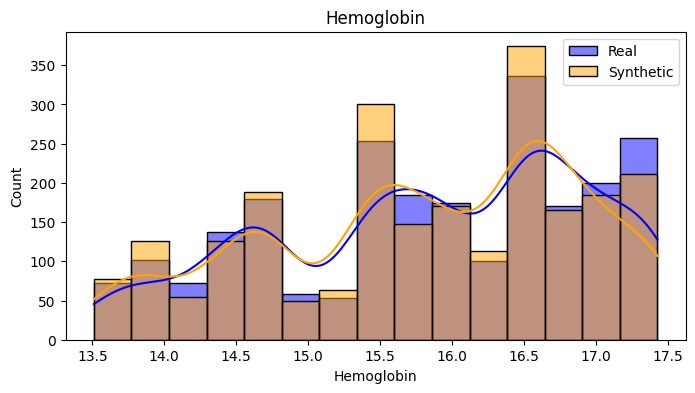

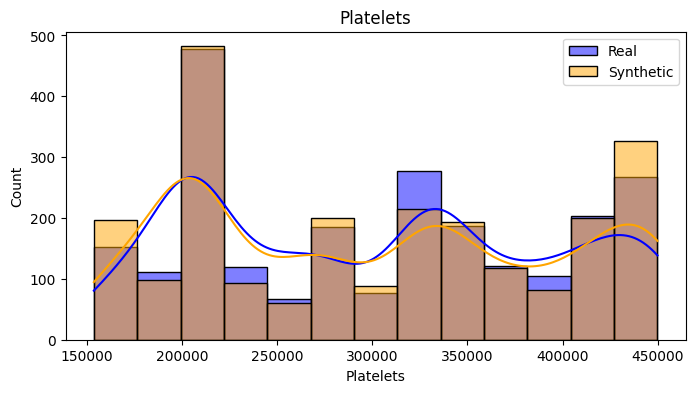

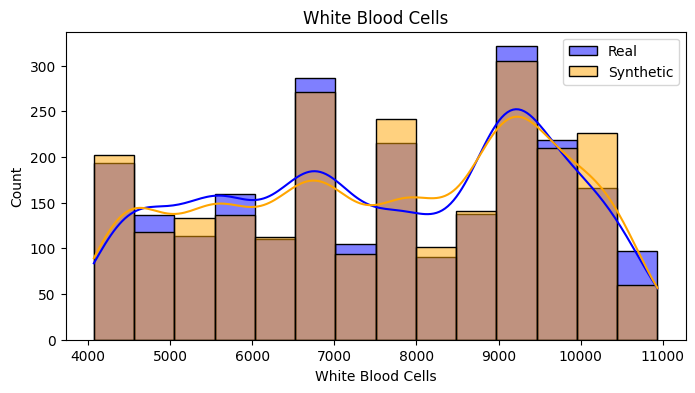

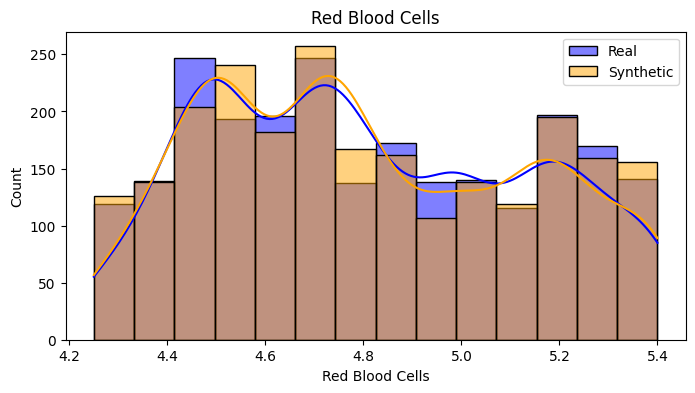

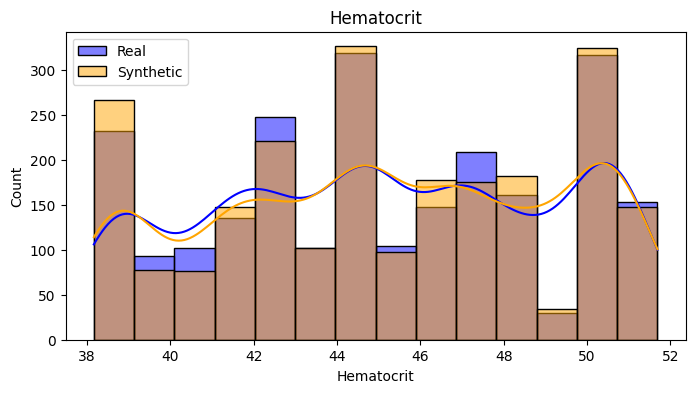

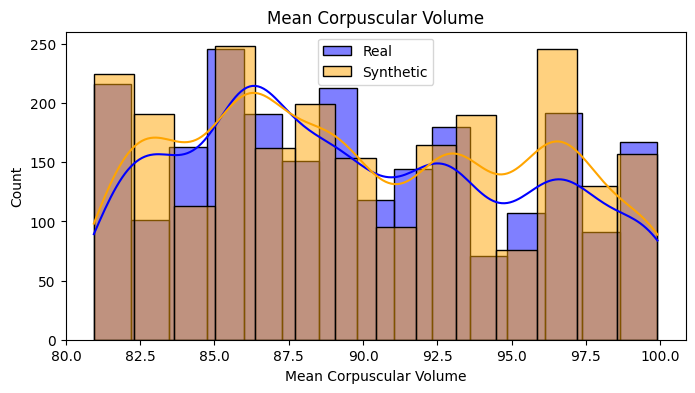

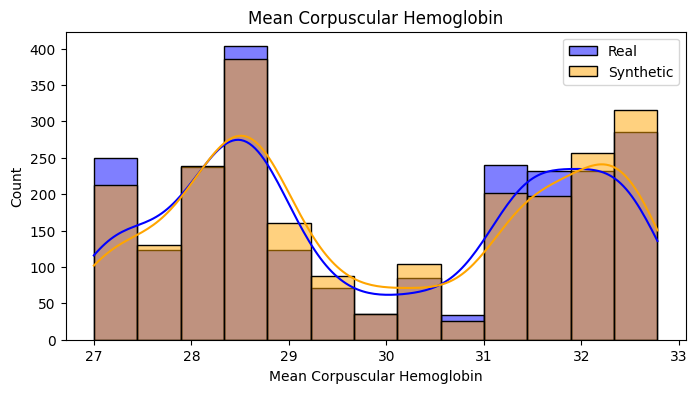

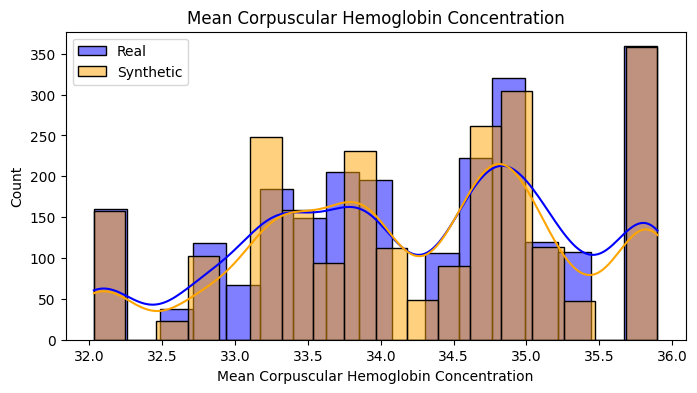

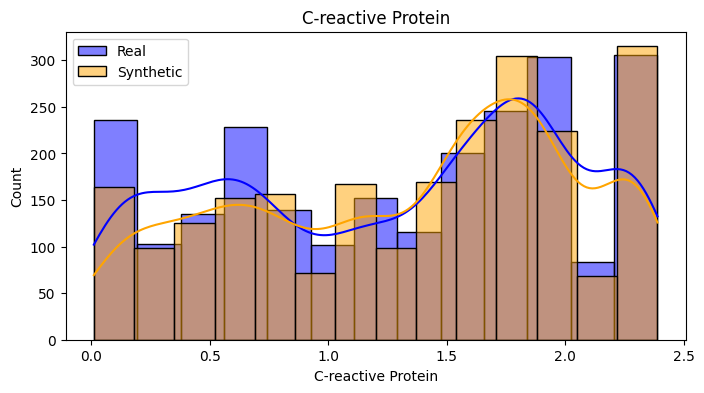

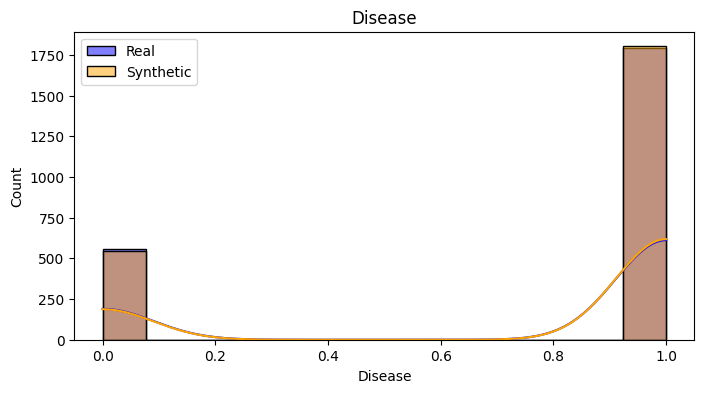

In [30]:
for column in df_blood.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_blood[column], color='blue', label='Real', kde=True)
    sns.histplot(df_blood_syn[column], color='orange', label='Synthetic', kde=True)
    plt.legend()
    plt.title(column)
    plt.show()

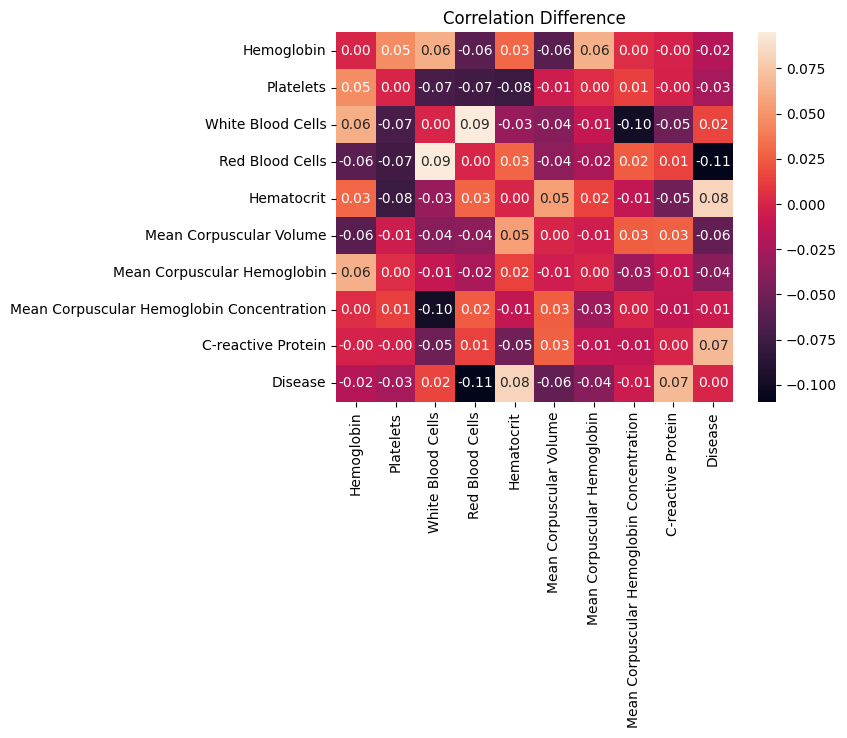

In [31]:
real_corr = df_blood.corr()
synthetic_corr = df_blood_syn.corr()

sns.heatmap(real_corr - synthetic_corr,fmt='.2f', annot=True)
plt.title("Correlation Difference")
plt.show()

In [32]:
df_blood_fn = pd.concat([df_blood,df_blood_syn], ignore_index=True)

In [33]:
df_blood_fn

,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,C-reactive Protein,Disease
0,16.35,410547.37,8812.03,4.84,42.06,92.62,27.01,35.18,2.31,0
1,17.28,421611.64,7553.98,4.68,40.30,86.15,28.25,34.02,1.20,1
2,15.68,270192.08,6061.77,4.66,46.75,85.90,32.21,32.11,2.34,1
3,15.18,207446.06,4568.18,4.40,39.03,93.37,27.75,34.00,1.06,1
4,17.39,385585.68,7107.16,4.73,50.53,88.84,28.54,35.22,0.28,1
...,...,...,...,...,...,...,...,...,...,...
4697,16.52,235346.74,5396.96,5.04,51.41,81.50,30.12,33.92,1.55,1
4698,14.20,211355.73,10018.03,4.46,44.83,92.79,28.57,33.51,2.26,1
4699,13.61,201336.16,9214.65,4.74,50.20,99.91,32.23,33.24,2.26,1
4700,16.35,341566.26,9734.94,4.51,48.52,86.10,31.62,34.00,0.58,0


In [34]:
# df_blood_fn.to_csv('Blood_immune_test.csv', index=False)

In [35]:
df.columns

Index(['Glucose', 'Cholesterol', 'Hemoglobin', 'Platelets',
       'White Blood Cells', 'Red Blood Cells', 'Hematocrit',
       'Mean Corpuscular Volume', 'Mean Corpuscular Hemoglobin',
       'Mean Corpuscular Hemoglobin Concentration', 'Insulin', 'BMI',
       'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Triglycerides',
       'HbA1c', 'LDL Cholesterol', 'HDL Cholesterol', 'ALT', 'AST',
       'Heart Rate', 'Creatinine', 'Troponin', 'C-reactive Protein',
       'Disease'],
      dtype='object')

In [36]:
df_diabetic = ['Glucose', 'Hemoglobin', 'Insulin', 'BMI', 
                     'Systolic Blood Pressure', 'Diastolic Blood Pressure', 
                     'HbA1c', 'LDL Cholesterol', 'HDL Cholesterol', 
                     'Creatinine', 'C-reactive Protein', 'Disease']

df_diabetes = df[df_diabetic]

In [37]:
df_diabetes

,Glucose,Hemoglobin,Insulin,BMI,Systolic Blood Pressure,Diastolic Blood Pressure,HbA1c,LDL Cholesterol,HDL Cholesterol,Creatinine,C-reactive Protein,Disease
0,121.77,16.35,5.68,18.96,95.57,61.43,5.01,82.93,50.26,0.66,2.31,0
1,78.53,17.28,16.42,23.87,107.43,71.12,5.71,109.15,42.14,1.00,1.20,1
2,101.68,15.68,16.64,22.20,91.37,73.27,4.93,93.24,48.44,0.85,2.34,1
3,79.56,15.18,17.41,19.58,94.18,63.21,4.03,72.41,56.53,0.89,1.06,1
4,82.37,17.39,8.69,22.21,93.55,60.11,4.86,78.78,44.43,0.69,0.28,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2346,70.91,15.30,22.68,20.15,93.06,67.12,5.34,88.69,51.90,0.68,0.02,1
2347,98.50,17.43,15.50,22.07,112.23,73.57,4.98,112.11,44.36,0.79,1.87,1
2348,94.10,15.83,20.78,22.73,107.92,73.27,4.28,79.35,49.47,0.96,0.40,1
2349,94.62,17.09,6.56,21.13,100.67,62.29,5.14,80.27,57.17,1.13,0.44,1


In [38]:
df_diabetes.to_csv('Diabetes_test.csv', index=False)

In [39]:
df_diabetes_syn = pd.read_csv('Diabetes_test_syn.csv')

In [40]:
df_diabetes

,Glucose,Hemoglobin,Insulin,BMI,Systolic Blood Pressure,Diastolic Blood Pressure,HbA1c,LDL Cholesterol,HDL Cholesterol,Creatinine,C-reactive Protein,Disease
0,121.77,16.35,5.68,18.96,95.57,61.43,5.01,82.93,50.26,0.66,2.31,0
1,78.53,17.28,16.42,23.87,107.43,71.12,5.71,109.15,42.14,1.00,1.20,1
2,101.68,15.68,16.64,22.20,91.37,73.27,4.93,93.24,48.44,0.85,2.34,1
3,79.56,15.18,17.41,19.58,94.18,63.21,4.03,72.41,56.53,0.89,1.06,1
4,82.37,17.39,8.69,22.21,93.55,60.11,4.86,78.78,44.43,0.69,0.28,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2346,70.91,15.30,22.68,20.15,93.06,67.12,5.34,88.69,51.90,0.68,0.02,1
2347,98.50,17.43,15.50,22.07,112.23,73.57,4.98,112.11,44.36,0.79,1.87,1
2348,94.10,15.83,20.78,22.73,107.92,73.27,4.28,79.35,49.47,0.96,0.40,1
2349,94.62,17.09,6.56,21.13,100.67,62.29,5.14,80.27,57.17,1.13,0.44,1


In [41]:
df_diabetes_syn

,Glucose,Hemoglobin,Insulin,BMI,Systolic Blood Pressure,Diastolic Blood Pressure,HbA1c,LDL Cholesterol,HDL Cholesterol,Creatinine,C-reactive Protein,Disease
0,111.97,14.26,8.23,18.96,95.57,60.49,5.01,82.93,50.26,0.66,2.31,0
1,121.09,17.09,21.61,20.76,98.74,70.03,5.73,89.58,57.91,0.68,0.84,1
2,98.50,14.83,12.71,22.08,99.11,75.11,4.63,103.07,58.45,0.65,0.25,1
3,125.24,16.61,14.31,20.33,111.25,72.52,4.05,95.38,55.20,0.93,1.08,0
4,111.73,14.54,16.68,18.71,106.66,73.56,5.48,74.52,45.02,1.02,2.18,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2346,82.26,15.47,6.51,22.28,93.28,65.65,4.62,83.07,49.47,0.68,0.71,1
2347,121.77,16.01,5.68,18.96,95.57,61.43,5.01,82.93,50.26,0.66,2.31,0
2348,94.39,16.82,14.31,23.55,94.87,73.49,5.31,96.91,54.24,0.83,0.44,1
2349,100.81,17.05,8.23,18.62,111.40,60.55,5.28,103.86,45.87,0.81,1.76,1


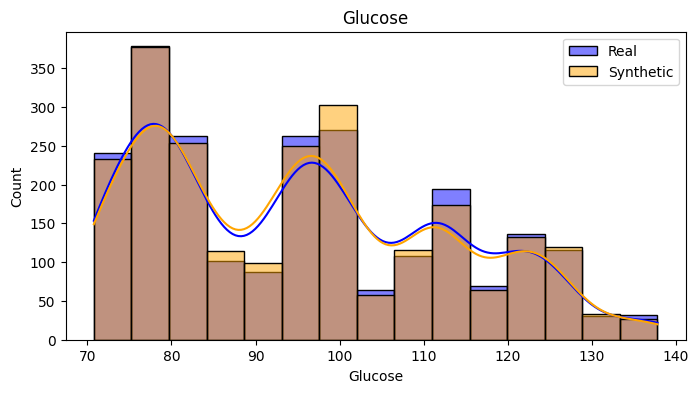

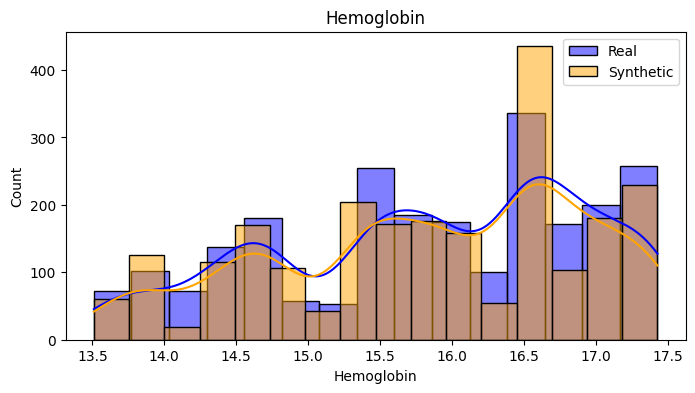

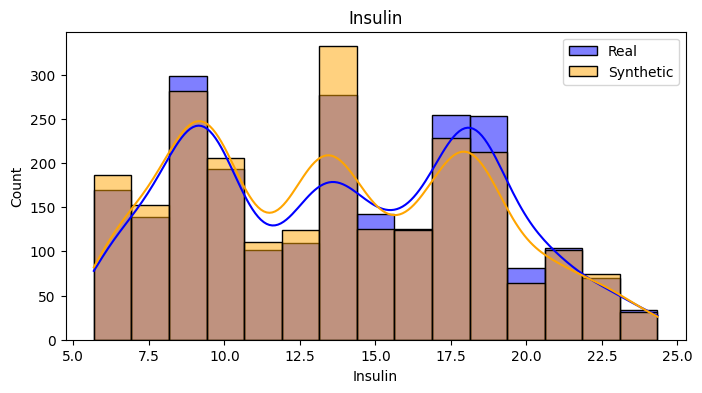

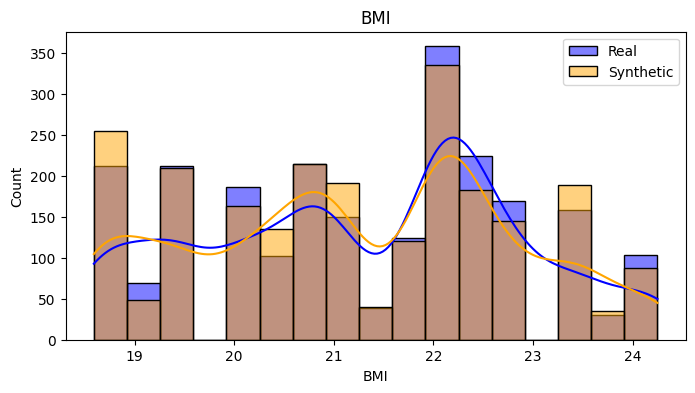

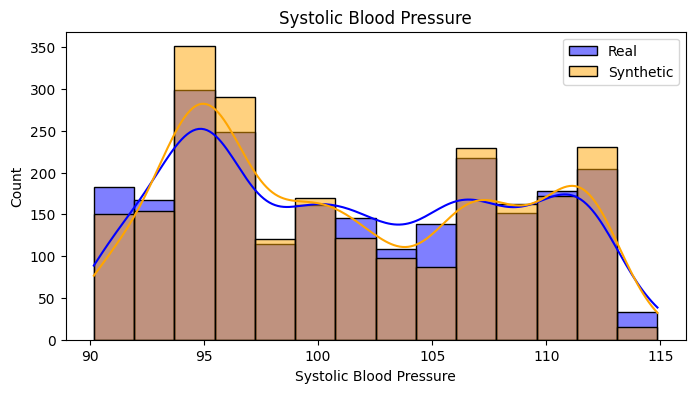

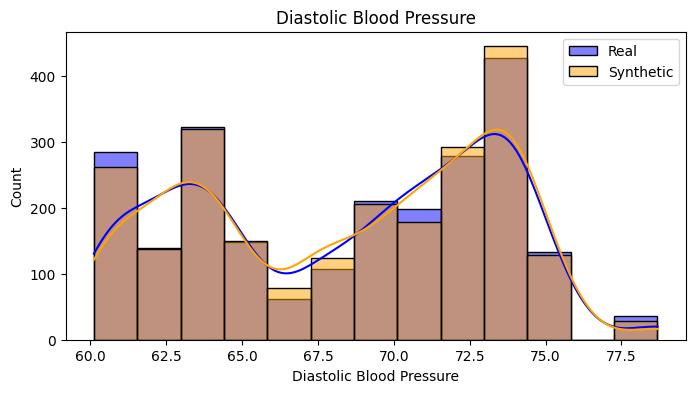

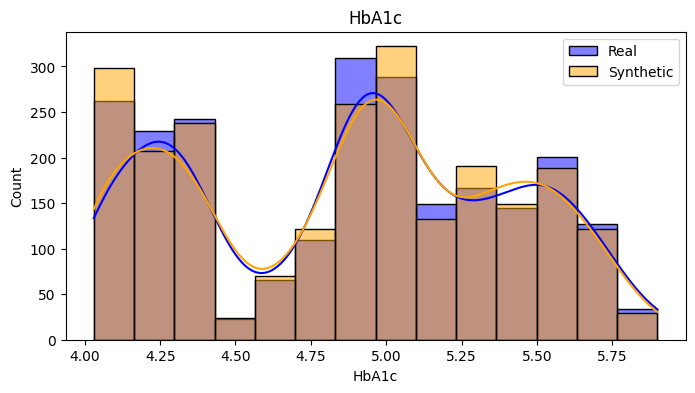

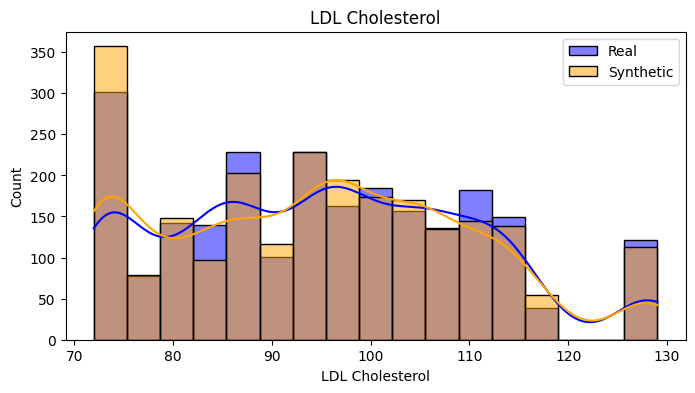

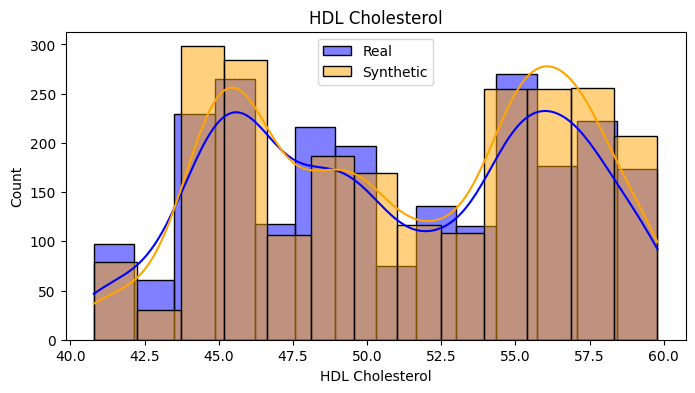

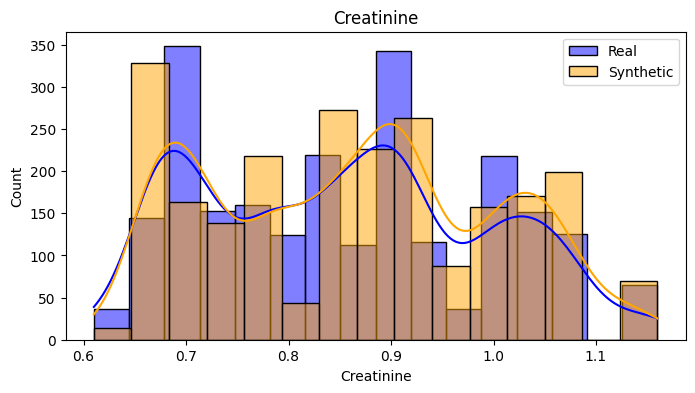

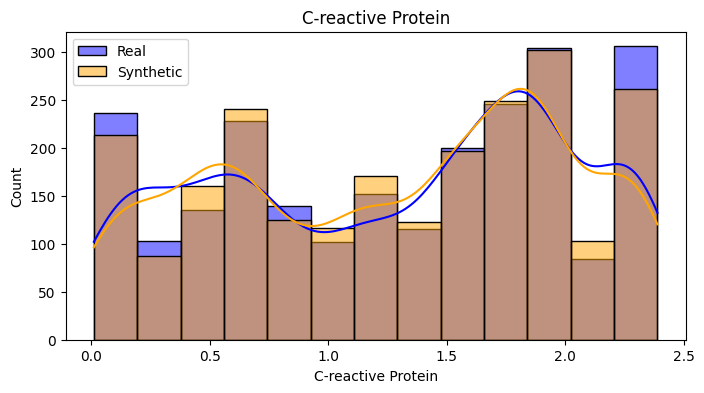

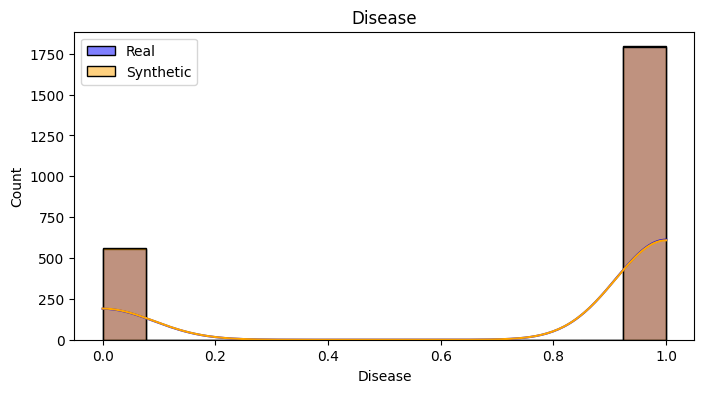

In [42]:
for column in df_diabetes.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_diabetes[column], color='blue', label='Real', kde=True)
    sns.histplot(df_diabetes_syn[column], color='orange', label='Synthetic', kde=True)
    plt.legend()
    plt.title(column)
    plt.show()

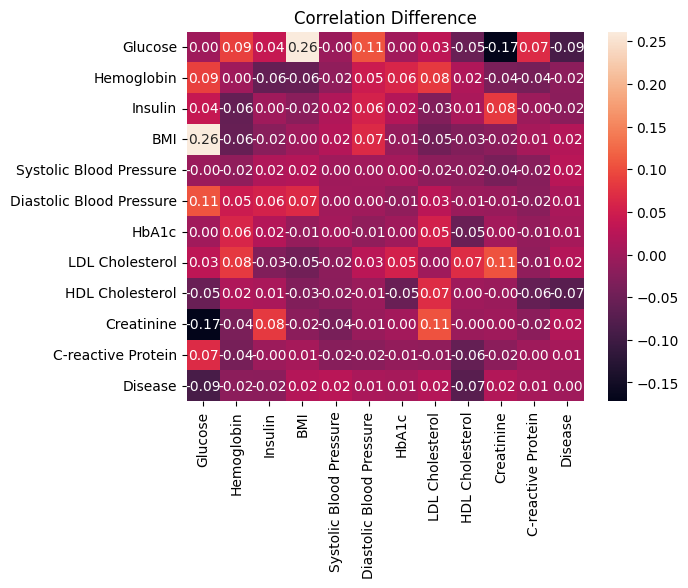

In [43]:
real_corr = df_diabetes.corr()
synthetic_corr = df_diabetes_syn.corr()

sns.heatmap(real_corr - synthetic_corr,fmt='.2f', annot=True)
plt.title("Correlation Difference")
plt.show()

In [44]:
df_diabetes = pd.concat([df_diabetes,df_diabetes_syn], ignore_index=True)

In [45]:
df_diabetes.to_csv('Diabetes_test.csv', index=False)

In [46]:
df.columns

Index(['Glucose', 'Cholesterol', 'Hemoglobin', 'Platelets',
       'White Blood Cells', 'Red Blood Cells', 'Hematocrit',
       'Mean Corpuscular Volume', 'Mean Corpuscular Hemoglobin',
       'Mean Corpuscular Hemoglobin Concentration', 'Insulin', 'BMI',
       'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Triglycerides',
       'HbA1c', 'LDL Cholesterol', 'HDL Cholesterol', 'ALT', 'AST',
       'Heart Rate', 'Creatinine', 'Troponin', 'C-reactive Protein',
       'Disease'],
      dtype='object')

In [47]:
df_test = pd.read_csv('blood_samples_dataset_test.csv')

In [48]:
for col, (min_val, max_val) in ranges.items():
    if col in df.columns:
        df_test[col] = df_test[col].apply(lambda x: de_standardize(x, min_val, max_val))

In [49]:
#labelencoder = LabelEncoder()
def disease_func(s):
    if s == 'Healthy':
        return 0
    else:
        return 1

In [50]:
df_test['Disease'] = df_test['Disease'].apply(lambda x: disease_func(x))

In [51]:
df = pd.concat([df, df_test], ignore_index=True)

In [52]:
selected_columns = ['Cholesterol', 'HDL Cholesterol', 'LDL Cholesterol', 
                     'Triglycerides', 'Systolic Blood Pressure', 
                     'Diastolic Blood Pressure', 'Heart Rate', 
                     'BMI', 'C-reactive Protein', 'Disease']

df_cardio = df[selected_columns]

In [53]:
df_cardio.to_csv('cardio_data.csv', index=False)

In [54]:
df

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,121.77,173.76,16.35,410547.37,8812.03,4.84,42.06,92.62,27.01,35.18,...,5.01,82.93,50.26,11.93,28.32,97.58,0.66,0.02,2.31,0
1,78.53,126.73,17.28,421611.64,7553.98,4.68,40.30,86.15,28.25,34.02,...,5.71,109.15,42.14,38.28,20.33,86.65,1.00,0.03,1.20,1
2,101.68,133.71,15.68,270192.08,6061.77,4.66,46.75,85.90,32.21,32.11,...,4.93,93.24,48.44,10.22,25.21,77.27,0.85,0.03,2.34,1
3,79.56,126.17,15.18,207446.06,4568.18,4.40,39.03,93.37,27.75,34.00,...,4.03,72.41,56.53,17.96,27.82,69.03,0.89,0.03,1.06,1
4,82.37,181.42,17.39,385585.68,7107.16,4.73,50.53,88.84,28.54,35.22,...,4.86,78.78,44.43,10.46,27.01,93.66,0.69,0.03,0.28,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2832,138.96,155.97,15.62,229129.56,7019.01,4.44,46.14,94.02,28.50,32.99,...,5.36,72.89,49.31,12.00,38.97,60.60,0.87,0.01,2.45,1
2833,110.73,172.20,15.47,420442.02,6434.58,4.96,47.77,90.34,31.05,35.19,...,4.52,98.94,55.99,34.22,19.76,93.01,1.07,0.02,2.53,1
2834,74.67,155.34,15.86,218520.28,4892.22,4.23,49.86,85.59,30.45,32.63,...,4.34,115.82,53.56,36.72,29.16,82.40,1.08,0.03,0.37,1
2835,133.10,157.30,14.48,397665.39,7457.19,5.07,47.25,88.91,29.10,33.37,...,5.79,100.00,42.24,26.45,16.34,97.53,0.88,0.03,1.98,1


In [55]:
metadata = Metadata()
metadata = metadata.detect_from_dataframe(df_cardio)

In [56]:
model = TVAESynthesizer(metadata, epochs=500, batch_size=240)

c:\Users\dynam\Projects\AI powered data analytics\.venv\Lib\site-packages\sdv\single_table\base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


In [57]:
model.fit(df_cardio)

  File "c:\Users\dynam\Projects\AI powered data analytics\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\dynam\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dynam\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\dynam\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [58]:
df_cardio_syn = model.sample(num_rows=10000)

In [59]:
df_cardio_syn

,Cholesterol,HDL Cholesterol,LDL Cholesterol,Triglycerides,Systolic Blood Pressure,Diastolic Blood Pressure,Heart Rate,BMI,C-reactive Protein,Disease
0,131.92,44.21,99.02,87.58,110.88,60.83,93.03,18.50,1.87,1
1,128.40,56.15,107.87,58.50,90.36,75.06,93.32,23.41,2.34,1
2,146.20,57.94,99.29,128.50,111.36,63.35,86.63,23.11,1.79,1
3,177.90,56.14,102.10,99.80,112.39,72.02,66.39,20.93,1.52,0
4,167.77,49.52,113.45,139.71,105.53,69.23,84.43,20.78,0.75,1
...,...,...,...,...,...,...,...,...,...,...
9995,140.68,59.73,96.81,76.95,111.47,60.33,92.36,20.90,1.67,1
9996,169.94,49.79,76.73,124.15,102.58,61.08,99.03,18.82,2.40,1
9997,170.10,56.93,75.17,118.42,91.55,69.97,97.23,19.40,1.19,1
9998,157.45,56.98,73.57,72.80,99.95,64.45,85.01,20.65,0.69,1


In [60]:
# def correlation_comparison(original_data, synthetic_data):
#     orig_corr = original_data.corr()
#     synth_corr = synthetic_data.corr()

#     diff_corr = abs(orig_corr - synth_corr)
#     print("Correlation Difference:\n", diff_corr)

# correlation_comparison(df_cardio, df_cardio_syn)



In [61]:
from scipy.stats import ks_2samp

def ks_test(original_data, synthetic_data, column):
    stat, p_value = ks_2samp(original_data[column], synthetic_data[column])
    print(f'{column} -> KS Statistic: {stat}, P-Value: {p_value}')

for col in df_cardio.columns:
    ks_test(df_cardio, df_cardio_syn, col)


Cholesterol -> KS Statistic: 0.050145400070497004, P-Value: 2.8516058797498177e-05
HDL Cholesterol -> KS Statistic: 0.05650585125132182, P-Value: 1.4109431503393813e-06
LDL Cholesterol -> KS Statistic: 0.04380634473034896, P-Value: 0.00039931467029374396
Triglycerides -> KS Statistic: 0.06613271060979908, P-Value: 7.53243159894063e-09
Systolic Blood Pressure -> KS Statistic: 0.03734113500176243, P-Value: 0.004084504129247814
Diastolic Blood Pressure -> KS Statistic: 0.07863612971448714, P-Value: 2.4633416781266943e-12
Heart Rate -> KS Statistic: 0.047374444836094466, P-Value: 9.444116022372891e-05
BMI -> KS Statistic: 0.04259072964399013, P-Value: 0.000636022040103638
C-reactive Protein -> KS Statistic: 0.07340930560451181, P-Value: 8.355254062144958e-11
Disease -> KS Statistic: 0.014055904124074727, P-Value: 0.7684912671758433


In [62]:
df_cardio_syn

,Cholesterol,HDL Cholesterol,LDL Cholesterol,Triglycerides,Systolic Blood Pressure,Diastolic Blood Pressure,Heart Rate,BMI,C-reactive Protein,Disease
0,131.92,44.21,99.02,87.58,110.88,60.83,93.03,18.50,1.87,1
1,128.40,56.15,107.87,58.50,90.36,75.06,93.32,23.41,2.34,1
2,146.20,57.94,99.29,128.50,111.36,63.35,86.63,23.11,1.79,1
3,177.90,56.14,102.10,99.80,112.39,72.02,66.39,20.93,1.52,0
4,167.77,49.52,113.45,139.71,105.53,69.23,84.43,20.78,0.75,1
...,...,...,...,...,...,...,...,...,...,...
9995,140.68,59.73,96.81,76.95,111.47,60.33,92.36,20.90,1.67,1
9996,169.94,49.79,76.73,124.15,102.58,61.08,99.03,18.82,2.40,1
9997,170.10,56.93,75.17,118.42,91.55,69.97,97.23,19.40,1.19,1
9998,157.45,56.98,73.57,72.80,99.95,64.45,85.01,20.65,0.69,1


In [63]:
df_cardio = pd.concat([df_cardio, df_cardio_syn], ignore_index=True)

In [ ]:
# df_cardio.to_csv('cardio_data.csv', index=False)

In [65]:
selected_columns = ['Cholesterol', 'HDL Cholesterol', 'LDL Cholesterol', 
                     'Triglycerides', 'Systolic Blood Pressure', 
                     'Diastolic Blood Pressure', 'Heart Rate', 
                     'BMI', 'C-reactive Protein', 'Disease']

df_cardio_real = df[selected_columns]

In [ ]:
# df_cardio_real.to_csv('cardio_data_real.csv', index=False)

In [ ]:
# df_cardio_syn.to_csv('cardio_data_syn.csv', index=False)